In [6]:
%matplotlib inline

In [12]:
# crime_visualization dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/Users/faisaldernawi/Desktop/Training_And_Development/GW_Bootcamp/Homework/Project_3/Data/Crime/Refined/crime_data_final.csv'  
crime_data = pd.read_csv(file_path)

In [14]:
# Display basic info to check the data
print(crime_data.info())
print(crime_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27930 entries, 0 to 27929
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tract    27930 non-null  int64  
 1   offense  27930 non-null  object 
 2   lat      27930 non-null  float64
 3   long     27930 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 872.9+ KB
None
   tract       offense        lat       long
0    101  THEFT F/AUTO  38.910560 -77.056058
1    101      BURGLARY  38.906082 -77.056424
2    101      BURGLARY  38.909371 -77.055193
3    101  THEFT F/AUTO  38.909352 -77.056369
4    101  THEFT F/AUTO  38.910597 -77.052772


In [16]:
print(crime_data.columns)

Index(['tract', 'offense', 'lat', 'long'], dtype='object')


In [23]:
 # Count incidents per tract
tract_counts = crime_data['tract'].value_counts().sort_index()

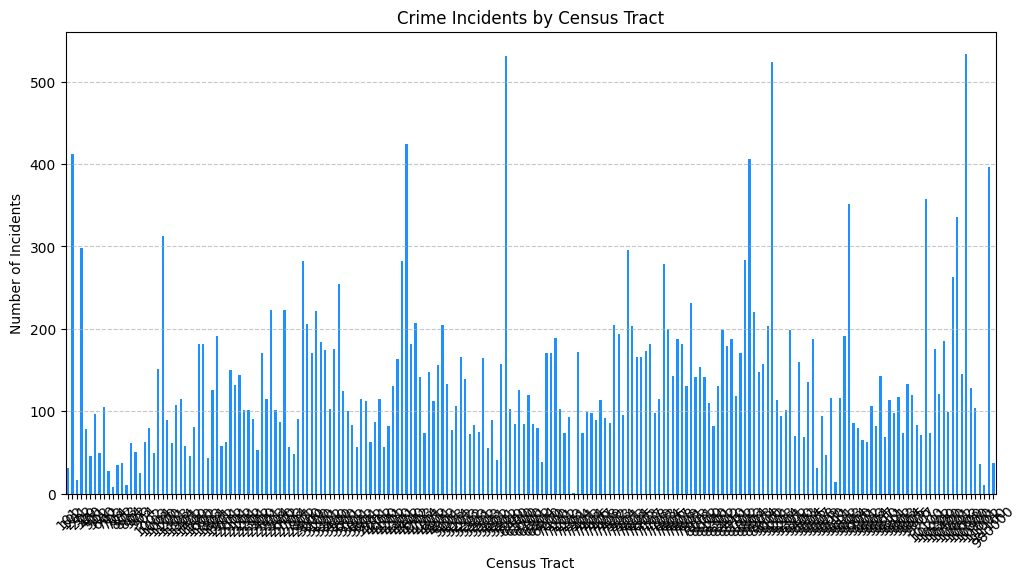

In [24]:
# Visualization 1: Crime by Census Tract (Bar Chart)
plt.figure(figsize=(12, 6))
tract_counts.plot(kind='bar', color='dodgerblue')
plt.title('Crime Incidents by Census Tract')
plt.xlabel('Census Tract')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Tract display ineffective -will group them by 1000's
crime_data['tract_bin'] = (crime_data['tract'] // 1000) * 1000
binned_counts = crime_data['tract_bin'].value_counts().sort_index()

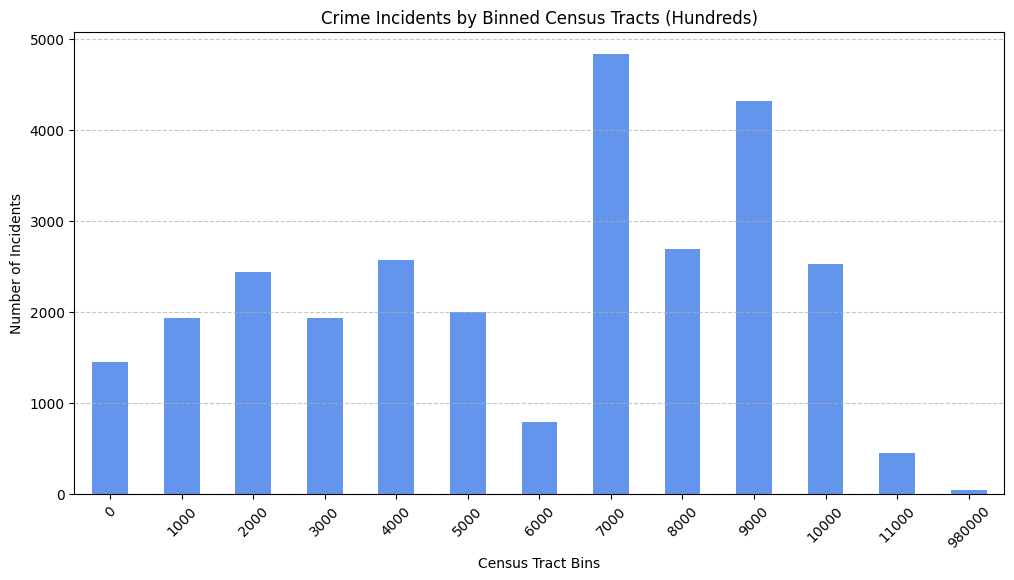

In [30]:
# Second plot : crime incidents by census tract
plt.figure(figsize=(12, 6))
binned_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Crime Incidents by Binned Census Tracts (Hundreds)')
plt.xlabel('Census Tract Bins')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Visualization 2: Crime Breakdown by Offense Type (Pie Chart)
def plot_offense_breakdown(data):
    offense_counts = data['OFFENSE'].value_counts().reset_index()
    offense_counts.columns = ['OFFENSE', 'COUNT']
    
    fig = px.pie(offense_counts, values='COUNT', names='OFFENSE', title='Crime Breakdown by Offense Type')
    fig.show()

# Visualization 3: Time Series of Crime (Line Chart)
def plot_crime_trends(data):
    data['START_DATE'] = pd.to_datetime(data['START_DATE'])
    data['MONTH_YEAR'] = data['START_DATE'].dt.to_period('M')
    monthly_counts = data.groupby('MONTH_YEAR').size()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o')
    plt.title('Crime Trends Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualization 4: Heatmap by Time of Day (Seaborn)
def plot_time_heatmap(data):
    data['HOUR'] = data['START_DATE'].dt.hour
    hourly_offense = pd.crosstab(data['HOUR'], data['OFFENSE'])
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(hourly_offense, cmap='YlGnBu', linewidths=0.3)
    plt.title('Crime Incidents by Time of Day')
    plt.xlabel('Offense Type')
    plt.ylabel('Hour of the Day')
    plt.show()

# Call Visualizations
if __name__ == "__main__":
    plot_crime_by_tract(crime_data)
    plot_offense_breakdown(crime_data)
    plot_crime_trends(crime_data)
    plot_time_heatmap(crime_data)